In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import pandas as pd
import math
from sklearn import metrics
from skimage.feature import hog

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train[0].shape

(28, 28)

In [ ]:
# Extract HOG features 
def extract_HOG_features(data):
    num_samples = data.shape[0]
    hog_features = []
    for i in range(num_samples):
        img = data[i]
        feature = hog(img, orientations=9, pixels_per_cell=(4, 4), cells_per_block=(3, 3))
        hog_features.append(feature)
    return np.array(hog_features)

In [ ]:
train_features = extract_HOG_features(x_train)
test_features = extract_HOG_features(x_test)

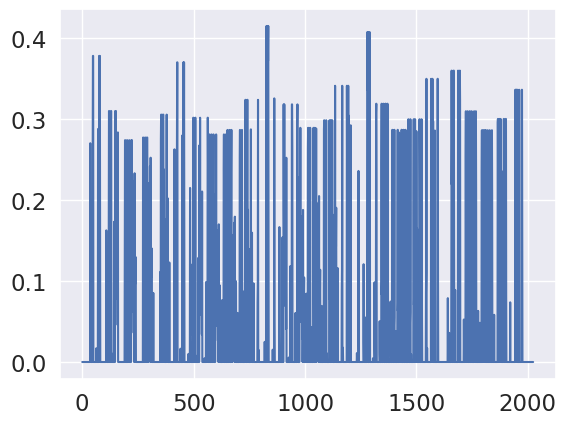

In [ ]:
plt.plot(train_features[0])

In [ ]:
train_features.shape

(60000, 2025)

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(2025, )),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
# Compile model with the loss function of categorical cross entropy 
# Categorical cross entropy is most commonly used for classification problems
model.compile(loss=loss_fn, optimizer="adam", metrics=["accuracy"])
## Print the summary of the model
# model.summary()

In [ ]:
# This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.
reduceLearningRate = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=0.0001)
# Stop training when a monitored metric has stopped improving.
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

# Train model with .fit function
history = model.fit(
    # Pass train_data and train_labels (the pre-process data saved before)
    train_features,
    y_train,
    validation_split=0.2,
    # validation_data=(x_test, y_test),
    epochs=30,
    batch_size=100,
    # Pass callbacks to Early stopping by two checkpoints
    # Read Early stopping method for more detail
    callbacks=[reduceLearningRate, earlyStopping]
)
model.save(r'/content/drive/MyDrive/Machine Learning/ANN_MNIST/Model/HOGtest.h5')

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


480/480 [==============================] - 4s 5ms/step - loss: 0.1876 - accuracy: 0.9444 - val_loss: 0.0609 - val_accuracy: 0.9811 - lr: 0.0010
Epoch 2/30
480/480 [==============================] - 2s 5ms/step - loss: 0.0932 - accuracy: 0.9717 - val_loss: 0.0579 - val_accuracy: 0.9823 - lr: 0.0010
Epoch 3/30
480/480 [==============================] - 3s 6ms/step - loss: 0.0783 - accuracy: 0.9751 - val_loss: 0.0502 - val_accuracy: 0.9846 - lr: 0.0010
Epoch 4/30
480/480 [==============================] - 2s 4ms/step - loss: 0.0677 - accuracy: 0.9788 - val_loss: 0.0500 - val_accuracy: 0.9845 - lr: 0.0010
Epoch 5/30
480/480 [==============================] - 2s 4ms/step - loss: 0.0603 - accuracy: 0.9808 - val_loss: 0.0469 - val_accuracy: 0.9859 - lr: 0.0010
Epoch 6/30
480/480 [==============================] - 2s 4ms/step - loss: 0.0564 - accuracy: 0.9819 - val_loss: 0.0509 - val_accuracy: 0.9844 - lr: 0.0010
Epoch 7/30
480/480 [==============================] - 2s 5ms/step - loss: 0.0431 

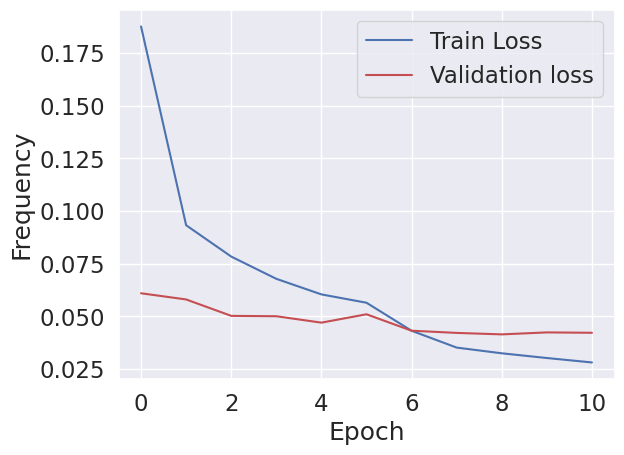

In [ ]:
## Plot loss and val_loss frequency in each epoch 
plt.plot(history.history["loss"], 'b', label="Train Loss")
plt.plot(history.history["val_loss"], 'r', label="Validation loss")
plt.axis([0, 9, 0, 0.5])
plt.xlabel("Epoch")
plt.ylabel("Frequency")
plt.legend()
plt.show()
plt.style.use('default')

313/313 [==============================] - 1s 2ms/step


<Axes: xlabel='Predict', ylabel='Actual'>

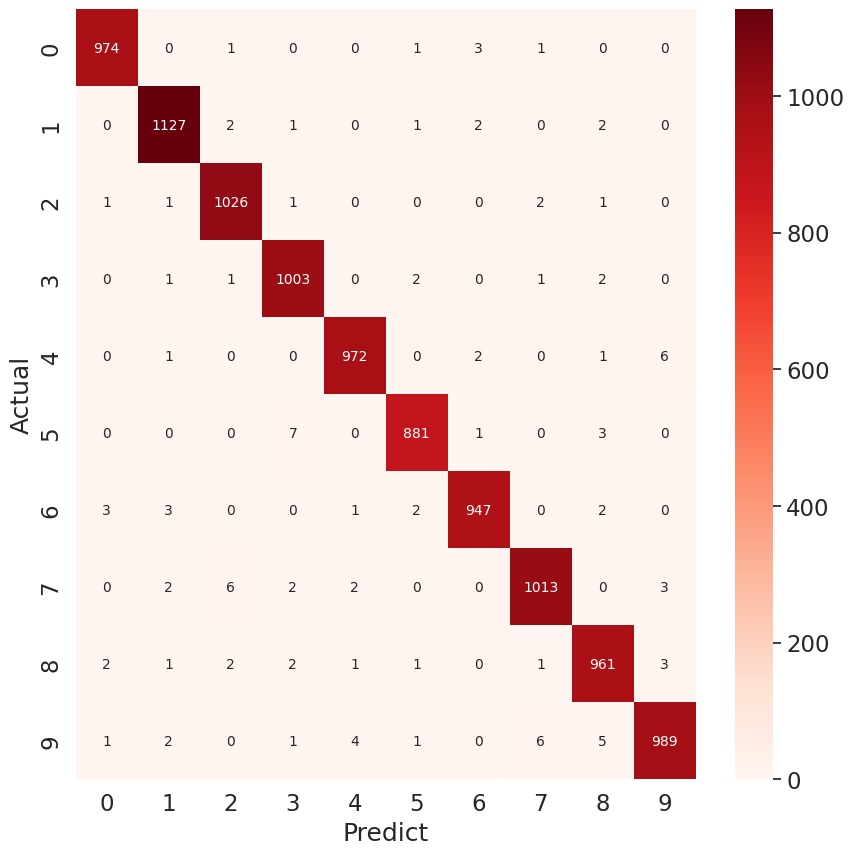

In [ ]:
predictions = model.predict(test_features)
actual = y_test
## Pass testLabels and predictions to confusion matrix
matrix = metrics.confusion_matrix(
    actual,
    np.argmax(predictions, axis = 1)
)
## Plot confusion matrix with matplotlib
labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

DataFrameMatrix = pd.DataFrame(matrix, columns=np.unique(labels), index = np.unique(labels))
DataFrameMatrix.index.name = 'Actual'
DataFrameMatrix.columns.name = 'Predict'
plt.figure(figsize = (10,10))
sn.set(font_scale=1.5) 
sn.heatmap(DataFrameMatrix, cmap="Reds", annot=True, annot_kws={"size": 10}, fmt="d")

In [ ]:
print(metrics.classification_report(actual, np.argmax(predictions, axis = 1), labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

